In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = "datasets\\housing"):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd
def load_housing_data(housing_path = "datasets\\housing"):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

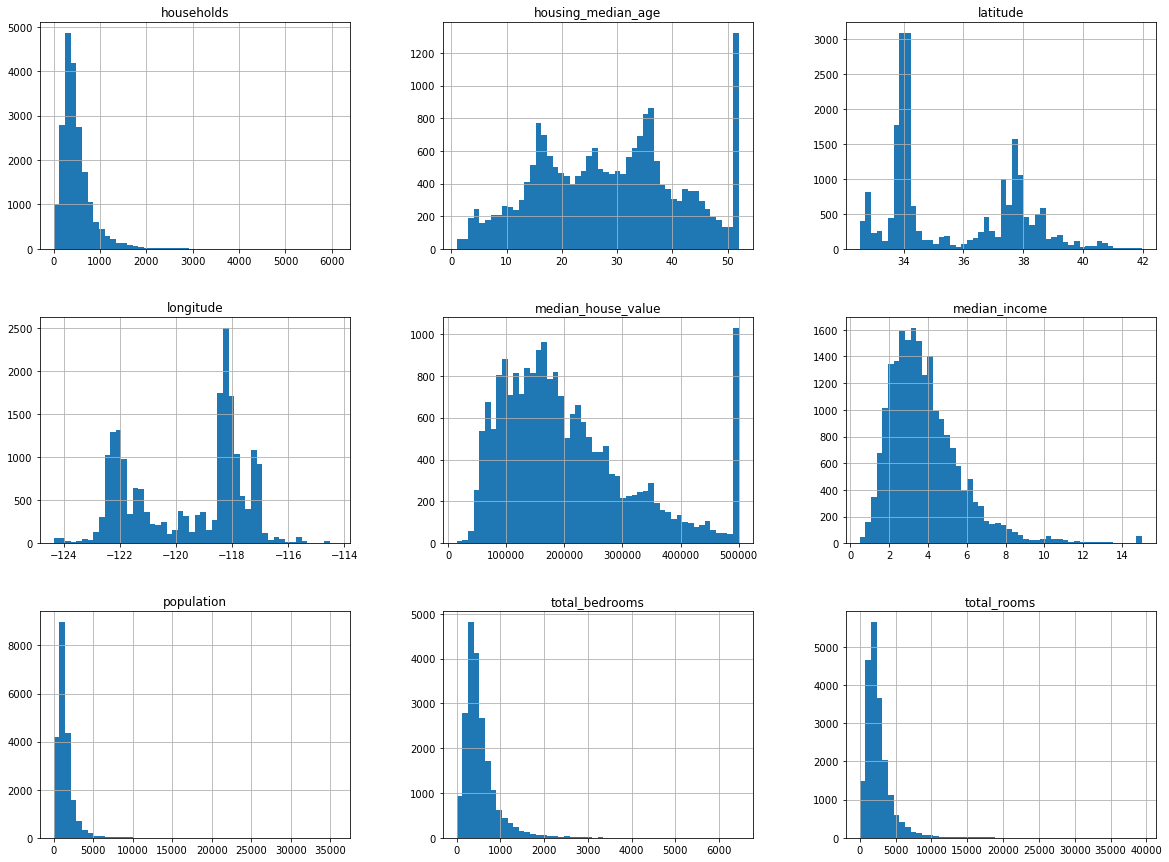

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (20,15))
plt.show()

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
#Stratified sampling
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

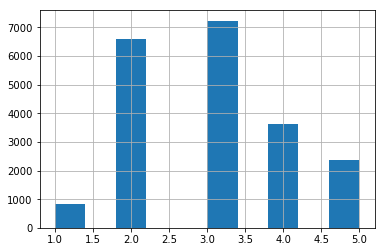

In [13]:
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [17]:
housing_strain = strat_train_set.copy()

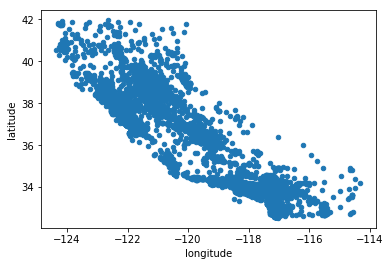

In [18]:
housing_strain.plot(kind = "scatter", x = "longitude", y = "latitude")

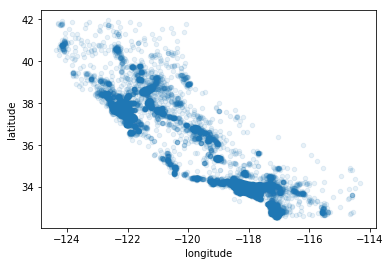

In [19]:
housing_strain.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

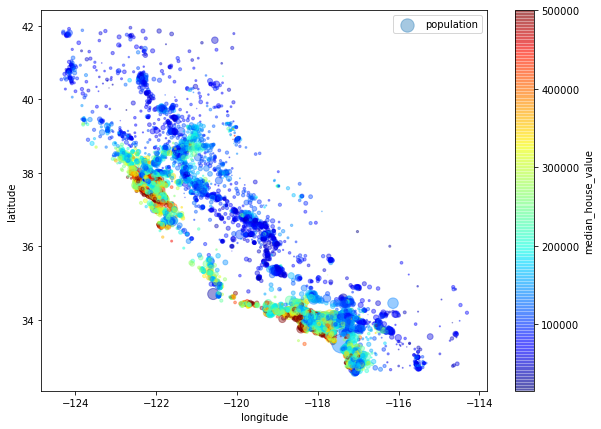

In [20]:
housing_strain.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
            s = housing_strain["population"]/100, label = "population", figsize = (10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True , sharex = False)
plt.legend()

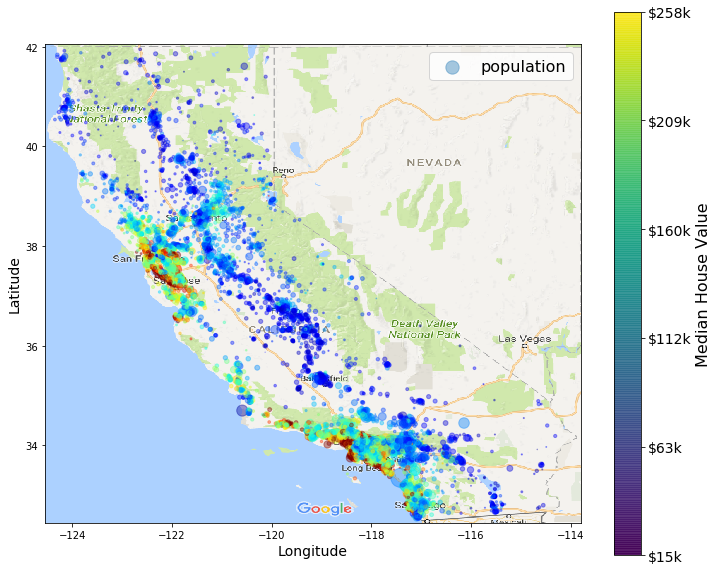

In [21]:
#Not exactly same image as of the author but pretty close to it
import matplotlib.image as mpimg
california_img=mpimg.imread('datasets\\housing\\california.png')
ax = housing_strain.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
            s = housing_strain["population"]/100, label = "population", figsize = (12,10),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.9)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing_strain["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [22]:
#looking for Correlations
corr_matrix = housing_strain.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188F1EAA550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000188F2578588>]], dtype=object)

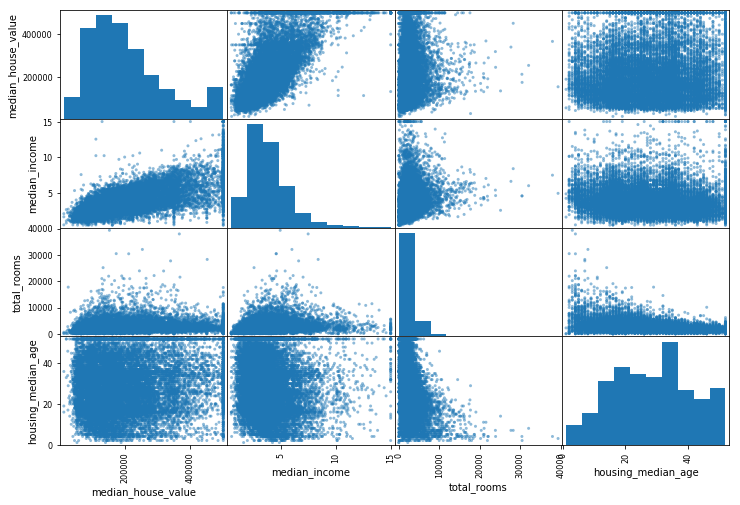

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_strain[attributes], figsize = (12,8))

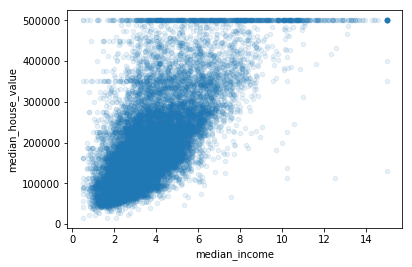

In [24]:
housing_strain.plot(kind = "scatter", x= "median_income", y = "median_house_value", alpha = 0.1)

In [25]:
housing_strain["rooms_per_household"] = housing_strain["total_rooms"]/housing_strain["households"]
housing_strain["bedrooms_per_room"] = housing_strain["total_bedrooms"]/housing_strain["total_rooms"]
housing_strain["population_per_household"] = housing_strain["population"]/housing_strain["households"]
corr_matrix = housing_strain.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [26]:
housing_strain = strat_train_set.drop("median_house_value", axis = 1)
housing_strain_labels = strat_train_set["median_house_value"].copy()

In [27]:
housing_strain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [28]:
#Imputing missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
housing_strain_num = housing_strain.drop("ocean_proximity", axis = 1)
imputer.fit(housing_strain_num)
print(imputer.statistics_)
print(housing_strain_num.median().values)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [29]:
X = imputer.transform(housing_strain_num)
housing_strain_tr = pd.DataFrame(X, columns = housing_strain_num.columns)
housing_strain_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [30]:
# Handling Text and Categorical attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_strain_cat = housing_strain["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_strain_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [31]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [32]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_strain_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_strain_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_strain_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [34]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelEncoder()
housing_strain_cat_1hot = encoder.fit_transform(housing_strain_cat)
housing_strain_cat_1hot

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [35]:
#Custom Transformations
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, poulation_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do here
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, poulation_ix] /X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_strain.values)

In [36]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing_strain.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [37]:
#Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_strain_num_tr = num_pipeline.fit_transform(housing_strain_num)

In [38]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [39]:
num_attribs = list(housing_strain_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binaizer', LabelBinarizer()),
])

#Joining two pipelines

from sklearn.pipeline import FeatureUnion

fullpipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

housing_prepared = fullpipeline.fit_transform(housing_strain)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
housing_prepared.shape

(16512, 16)

In [41]:
#Training and Evaluating on Training set

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_strain_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
some_data = housing_strain.iloc[:5]
some_labels = housing_strain_labels.iloc[:5]
some_data_prepared = fullpipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))
print("Labels", list(some_labels))

predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_strain_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

In [44]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_strain_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_strain_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [46]:
#Better Evaluation using Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_strain_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 69430.4638092   67015.77248428  70034.43074086  68788.08972301
  71720.32180761  75391.62430153  70971.17105427  70393.80258634
  75295.59531967  69490.84746795]
Mean: 70853.2119295
Standard deviation: 2546.56888543


In [48]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_strain_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [49]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_strain_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_strain_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22083.474500012031

In [51]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_strain_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 50647.79151649  50243.96498516  53281.84650906  54714.76808824
  51709.06497944  55530.23863323  51229.80678421  50714.36360427
  55423.26770134  52170.23469181]
Mean: 52566.5347493
Standard deviation: 1930.19778548


In [52]:
#Fine Tuning the models using GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_strain_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64489.2952806 {'max_features': 2, 'n_estimators': 3}
55868.8438433 {'max_features': 2, 'n_estimators': 10}
53048.9561041 {'max_features': 2, 'n_estimators': 30}
59675.7114262 {'max_features': 4, 'n_estimators': 3}
53463.5138618 {'max_features': 4, 'n_estimators': 10}
50502.2541359 {'max_features': 4, 'n_estimators': 30}
59907.3765367 {'max_features': 6, 'n_estimators': 3}
52170.7646996 {'max_features': 6, 'n_estimators': 10}
49711.0451308 {'max_features': 6, 'n_estimators': 30}
58425.8645313 {'max_features': 8, 'n_estimators': 3}
52539.8773782 {'max_features': 8, 'n_estimators': 10}
49933.0120748 {'max_features': 8, 'n_estimators': 30}
62180.5452973 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54975.2305101 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59803.3505298 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53221.3367089 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58102.3377533 {'bootstrap': False, 'max_features': 5, 'n_estim

In [56]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [57]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31869756975943681, 'median_income'),
 (0.14001523246101827, 'INLAND'),
 (0.10142315039143743, 'population_per_household'),
 (0.086970989044082139, 'longitude'),
 (0.084063600061959551, 'bedrooms_per_room'),
 (0.07415693642770331, 'latitude'),
 (0.05593819336428988, 'rooms_per_household'),
 (0.042812418755644045, 'housing_median_age'),
 (0.017920867262772928, 'population'),
 (0.017753288696312722, '<1H OCEAN'),
 (0.01688823784378966, 'total_rooms'),
 (0.016386418694502042, 'households'),
 (0.016217129431019252, 'total_bedrooms'),
 (0.0053634282034167261, 'NEAR BAY'),
 (0.0053578446012111655, 'NEAR OCEAN'),
 (3.4695001404037286e-05, 'ISLAND')]